# Model Development

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("20230101_automobile_wrangling.csv")

In [55]:
df.head()

,Unnamed:_0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100Km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,5000.0,21,8.703704,13495.0,11.190476,Low,0,1,1,0
1,1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,5000.0,21,8.703704,16500.0,11.190476,Low,0,1,1,0
2,2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,...,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1,1,0
3,3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,...,5500.0,24,7.833333,13950.0,9.791667,Low,0,1,1,0
4,4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,...,5500.0,18,10.681818,17450.0,13.055556,Low,0,1,1,0


## Linear and Multiple Linear Regression

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
lm  = LinearRegression()

In [8]:
X = df.filter(regex='highway-L/100')
# X = df[['highway-L/100Km']] 
# Showing error ??

In [11]:
Y = df['price']

In [12]:
X.shape

(201, 1)

In [30]:
lm.fit(X,Y)

LinearRegression()

In [32]:
Yhat = lm.predict(X)

In [33]:
type(Yhat)

numpy.ndarray

In [34]:
Yhat[0:5]

array([15485.52737455, 15485.52737455, 16643.34931414, 12475.19033163,
       22327.2024721 ])

In [35]:
lm.coef_

array([3458.68511314])

In [27]:
lm.intercept_

-64384.436327421616

In [38]:
lm1 = LinearRegression()
lm1.fit(df[['engine-size']], df[['price']])
print(lm1.intercept_)

[-7963.33890628]


In [39]:
lm1.coef_

array([[166.86001569]])

Multiple Linear

In [57]:
Z = df[['horsepower','curb-weight','engine-size','highway-L/100km']]

In [58]:
lm.fit(Z, df['price'])

LinearRegression()

In [59]:
lm.intercept_

-14383.535206928053

In [60]:
lm.coef_

array([ 36.71264156,   3.50108045,  85.34516358, 499.5518178 ])

In [62]:
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses' , 'highway-L/100km']],df['price'])
lm2.coef_


array([-2.86467994e+00,  3.46770737e+03])

## Model Evaluation Using Visualization

In [63]:
import seaborn as sns

(0.0, 47713.83724932422)

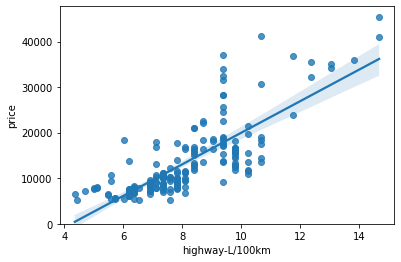

In [65]:
sns.regplot(x = 'highway-L/100km', y = 'price', data = df)
plt.ylim(0,)

(0.0, 47414.1)

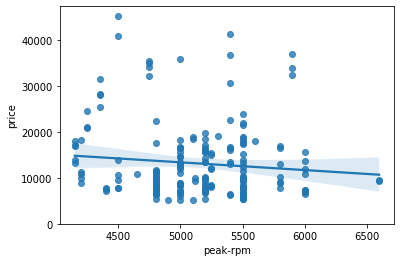

In [66]:
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [67]:
df[["peak-rpm","highway-L/100km","price"]].corr()

,peak-rpm,highway-L/100km,price
peak-rpm,1.000000,0.017736,-0.101542
highway-L/100km,0.017736,1.000000,0.801118
price,-0.101542,0.801118,1.000000


### Residual plot

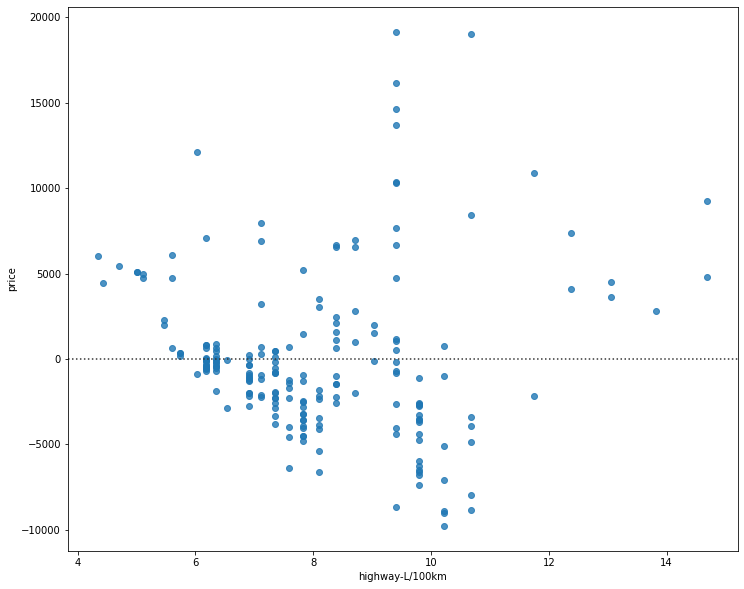

In [70]:
plt.figure(figsize = (12,10))
sns.residplot('highway-L/100km', 'price', data = df)
plt.show()

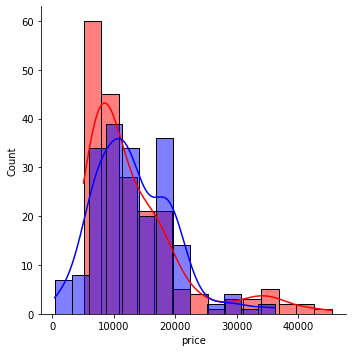

In [93]:
# Multiple Linear Regression Visual Evaluation
Y_hat = lm.predict(Z)
sns.displot(data = df['price'], color = 'r',kde = True, label= 'Actual Value')
sns.histplot(data = Yhat, color = 'b',kde= True, label= 'Fitted_Value')
plt.show()

In [94]:
## How to hide hist of one of above 

<AxesSubplot: xlabel='price'>

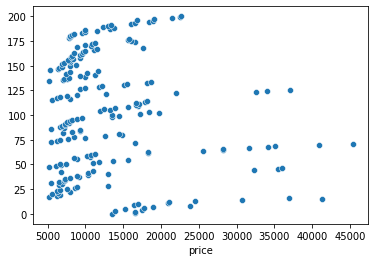

In [99]:
sns.scatterplot( x = 'price', y = df.index, data = df)

<AxesSubplot: xlabel='highway-L/100km', ylabel='price'>

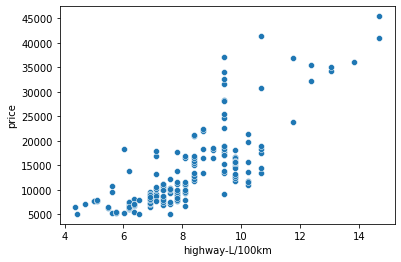

In [106]:
sns.scatterplot(x = 'highway-L/100km', y = 'price', data= df)

## Polynomail Regression

In [157]:
# Graph for polynomial fuction
def PlotPolly(model, independent_variable):
    dependent_variable = model(independent_variable)
    plt.plot(independent_variable, dependent_variable,'.')


    plt.show()
    plt.close()

In [123]:
# def PlotPolly(model, independent_variable, dependent_variabble, Name):
#     x_new = np.linspace(15, 55, 100)
#     y_new = model(x_new)

#     plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
#     plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
#     ax = plt.gca()
#     ax.set_facecolor((0.898, 0.898, 0.898))
#     fig = plt.gcf()
#     plt.xlabel(Name)
#     plt.ylabel('Price of Cars')

#     plt.show()
#     plt.close()

In [153]:
y2  = polynomial(np.linspace(15,55,100))
y2

array([   44080.77927594,    46007.91294106,    47883.45796449,
          49698.15187113,    51442.73218586,    53107.93643356,
          54684.50213913,    56163.16682745,    57534.66802341,
          58789.74325189,    59919.13003779,    60913.56590598,
          61763.78838136,    62460.53498881,    62994.54325322,
          63356.55069948,    63537.29485247,    63527.51323708,
          63317.94337819,    62899.3228007 ,    62262.38902949,
          61397.87958944,    60296.53200545,    58949.0838024 ,
          57346.27250518,    55478.83563867,    53337.51072776,
          50913.03529734,    48196.1468723 ,    45177.58297751,
          41848.08113788,    38198.37887828,    34219.2137236 ,
          29901.32319873,    25235.44482856,    20212.31613797,
          14822.67465184,     9057.25789508,     2906.80339256,
          -3637.95133083,   -10586.26875021,   -17947.41134068,
         -25730.64157736,   -33945.22193537,   -42600.41488981,
         -51705.4829158 ,   -61269.68848

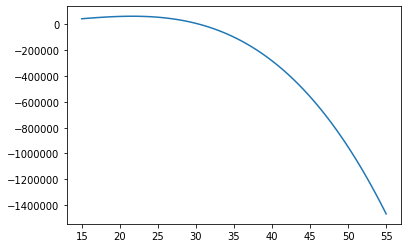

In [152]:
plt.plot(np.linspace(15,55,100),polynomial(np.linspace(15,55,100)), '-')
plt.ticklabel_format(useOffset=False, style='plain')

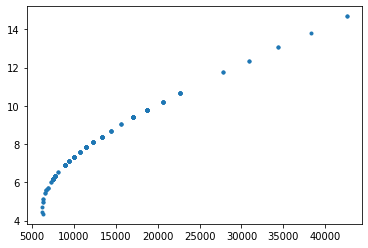

In [140]:
plt.plot(yhat,df['highway-L/100km'] ,'.')

In [142]:
df['highway-L/100km'].min()

4.351851851851852

In [236]:
x = df['highway-L/100km']
y = df['price']

In [239]:
fit = np.polyfit(x, y, 3)
polynomial = np.poly1d(fit)
print(polynomial)

       3         2
-23.4 x + 923.6 x - 7083 x + 2.152e+04


In [133]:
yhat = polynomial(df['highway-L/100km'])

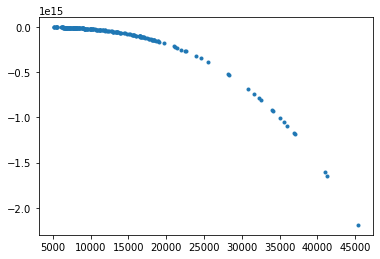

In [131]:
PlotPolly(polynomial, df['price'])

In [116]:
fit2 = np.polyfit(x,y,11)
polynomial2 = np.poly1d(fit2)
polynomial2

poly1d([ 3.54540140e-03, -4.73280490e-01,  2.68683864e+01, -8.70270709e+02,
        1.80307629e+04, -2.52270980e+05,  2.44069486e+06, -1.63682859e+07,
        7.47019996e+07, -2.21263681e+08,  3.83240399e+08, -2.94343389e+08])

In [117]:
print(polynomial2)

          11          10         9         8             7
0.003545 x  - 0.4733 x  + 26.87 x - 870.3 x + 1.803e+04 x
              6             5             4            3             2
 - 2.523e+05 x + 2.441e+06 x - 1.637e+07 x + 7.47e+07 x - 2.213e+08 x + 3.832e+08 x - 2.943e+08


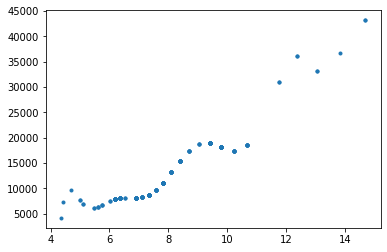

In [158]:
PlotPolly(polynomial2, df['highway-L/100km'])

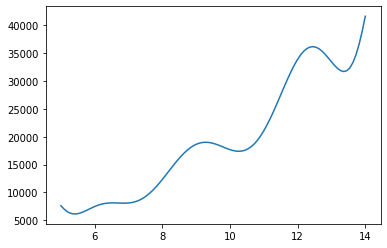

In [162]:
plt.plot(np.linspace(5,14,100),polynomial2(np.linspace(5,14,100)), '-')
plt.ticklabel_format(useOffset=False, style='plain')

### Polynomial Multivariate 

In [166]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
pr = PolynomialFeatures(degree = 2)
pr

PolynomialFeatures()

In [170]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']]

In [172]:
Z_pr = pr.fit_transform(Z)

In [173]:
print(Z.shape,Z_pr.shape)

(201, 4) (201, 15)


In [ ]:
## Why are thier shapes different ?

## Pipeline

In [176]:
from sklearn.pipeline import Pipeline

In [183]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]


In [184]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [185]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [186]:
ypipe = pipe.predict(Z)

In [188]:
ypipe[0:10]

array([12395.97939239, 12395.97939239, 18425.76361762,  9981.83005507,
       17552.10180769, 13495.52907994, 14610.64282949, 15069.81768809,
       19740.53605408, 10021.73195238])

In [189]:
Input2 = [('scale', StandardScaler()),('model',LinearRegression())]
pipe2  = Pipeline(Input2)
pipe2.fit(Z,y)
ypipe2 = pipe2.predict(Z)
ypipe2[0:10]

array([14055.14326508, 14055.14326508, 18641.40645967, 10758.95798023,
       16668.53370034, 14734.79338711, 15914.6574987 , 16299.77634818,
       18610.5191684 , 10974.89925173])

### Quantative Evaluation

#### R-squared (coefficient of determination) and MSE (mean squared error)

In [192]:
# Linear Regression

In [193]:
X.head()

,highway-L/100km
0,8.703704
1,8.703704
2,9.038462
3,7.833333
4,10.681818


In [199]:
Y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [195]:
lm_test = LinearRegression()
lm_test.fit(X,Y)

LinearRegression()

In [204]:
lm_test.score(X,Y)

0.6417894513258818

In [201]:
Yhat = lm_test.predict(X)
Yhat[0:4]

array([15485.52737455, 15485.52737455, 16643.34931414, 12475.19033163])

In [202]:
from sklearn.metrics import mean_squared_error

In [203]:
mse_test = mean_squared_error(X,Yhat)
mse_test

214523622.02127507

In [205]:
# Multiple Linear Regression

In [206]:
lm_test_multiple  = LinearRegression()
lm_test_multiple.fit(Z,X)

LinearRegression()

In [207]:
Yhat_lmtm = lm_test_multiple.predict(Z)

In [224]:
lm_test_multiple.score(Z,Y)
# not same as Y, Z

-2.7719274765621336

In [221]:
mean_squared_error(Yhat_lmtm,df['price'])
# same as df['price'], Yhat_lmtm

237034165.79836023

In [225]:
# Polynomial

In [241]:
# polynomial.score(Y,polynomial(x)) -- poly1d has no attribute score

In [242]:
from sklearn.metrics import r2_score

In [245]:
r_squared_polynomial = r2_score(Y, polynomial(X))
r_squared_polynomial

0.6753581660812171

In [234]:
mean_squared_error(df['price'], polynomial(X))

20401030.180019397

## Prediction

In [260]:
test_data = np.arange(1,100,1).reshape(-1,1)

In [261]:
lm_p = LinearRegression()

In [269]:
lm_p.fit(X.values,Y)

LinearRegression()

In [270]:
yhat_test = lm_p.predict(test_data)
yhat_test[0:4]

array([-11159.15794152,  -7700.47282838,  -4241.78771523,   -783.10260209])

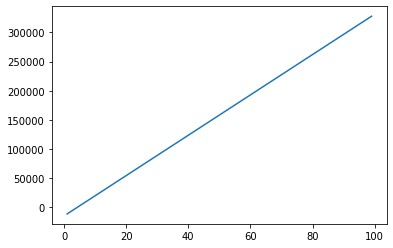

In [271]:
plt.plot(test_data, yhat_test)
plt.show()

### In this case MLR model is most suitable. Because its R-squared is largest and MSE is lowest.

#### Thank You